<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorio N°06

## Objetivos de la clase

* Reforzar los conceptos básicos del E.D.A..

## Contenidos

* [Problema 01](#p1)


## Problema 01
<img src="./images/logo_iris.jpg" width="360" height="360" align="center"/>

El **Iris dataset** es un conjunto de datos que contine una  muestras de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros.

Lo primero es cargar el conjunto de datos y ver las primeras filas que lo componen:

In [1]:
# librerias
 
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', 500)  # Ver más columnas de los dataframes


# Ver gráficos de matplotlib en jupyter notebook/lab
%matplotlib inline

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","iris_contaminados.csv"))
df.columns = ['sepalLength',
                  'sepalWidth',
                  'petalLength',
                  'petalWidth',
                  'species']

df.head() 

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,4.4,3.2,1.3,3.0,setosa
1,7.2,3.6,6.1,2.5,virginica
2,6.3,3.3,6.0,2.5,VIRGINICA
3,6.7,3.3,5.7,2.5,virginica
4,6.3,3.4,5.6,2.4,virginica


### Bases del experimento

Lo primero es identificar las variables que influyen en el estudio y la naturaleza de esta.

* **species**: 
    * Descripción: Nombre de la especie de Iris. 
    * Tipo de dato: *string*
    * Limitantes: solo existen tres tipos (setosa, virginia y versicolor).
* **sepalLength**: 
    * Descripción: largo del sépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 4.0 y 7.0 cm.
* **sepalWidth**: 
    * Descripción: ancho del sépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 2.0 y 4.5 cm.
* **petalLength**: 
    * Descripción: largo del pétalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 1.0 y 7.0 cm.
* **petalWidth**: 
    * Descripción: ancho del pépalo. 
    * Tipo de dato: *integer*. 
    * Limitantes: los valores se encuentran entre 0.1 y 2.5 cm.

Su objetivo es realizar un correcto **E.D.A.**, para esto debe seguir las siguientes intrucciones:

In [3]:
df.columns = df.columns.str.lower().str.strip() # Normalizamos las columnas a minusculas

1. Realizar un conteo de elementos de la columna **species** y corregir según su criterio. Reemplace por "default" los valores nan..

In [4]:
len(df["species"].unique()) #Calculamos la cantidad de especies

11

In [5]:
df['species'] = df['species'].str.lower().str.strip() #Corregimos el formato de los string
df.loc[df['species'].isnull(),'species'] = 'default' #Cambiamos los valores nulos por "default"
df["species"].unique() #Ahora tenemos 4 especies donde 1 de ellas es default que cambiamos nosotros

array(['setosa', 'virginica', 'versicolor', 'default'], dtype=object)

2. Realizar un gráfico de box-plot sobre el largo y ancho de los petalos y sépalos. Reemplace por **0** los valores nan.

<AxesSubplot:>

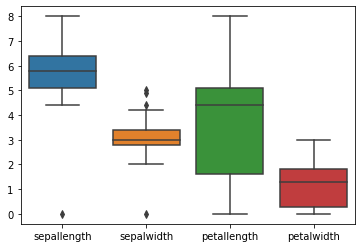

In [6]:
df.loc[df['sepallength'].isnull(),'sepallength'] = 0 #Cambiamos los valores nulos por 0
df.loc[df['sepalwidth'].isnull(),'sepalwidth'] = 0 
df.loc[df['petallength'].isnull(),'petallength'] = 0 
df.loc[df['petalwidth'].isnull(),'petalwidth'] = 0 

#Sacamos los datos que no necesitamos de species
stats_df = df.drop([ 'species'], axis=1) 

#Graficamos los datos en un grafico box-plot
sns.boxplot(data=stats_df)

3. Anteriormente se define un rango de valores válidos para los valores del largo y ancho de los petalos y sépalos. Agregue una columna denominada **label**  que identifique cuál de estos valores esta fuera del rango de valores válidos.

In [7]:
df["label"] = "valido" #Agregamos la columna label con todos los elementos validos en principio

#Vamos filtrando los valores segun el rango de cada columna permitido

df.loc[df['sepallength']> 7.0 ,'label'] = "invalido" #Agregamos los valores invalidos segun corresponda en label 
df.loc[df['sepallength']< 4.0 ,'label'] = "invalido" 
df.loc[df['sepalwidth']> 4.5 ,'label'] = "invalido" 
df.loc[df['sepalwidth']< 2.0 ,'label'] = "invalido" 
df.loc[df['petallength']> 7.0 ,'label'] = "invalido"
df.loc[df['petallength']< 1.0 ,'label'] = "invalido"
df.loc[df['petalwidth']< 0.1 ,'label'] = "invalido"
df.loc[df['petalwidth']> 2.5 ,'label'] = "invalido"

df.head()


,sepallength,sepalwidth,petallength,petalwidth,species,label
0,4.4,3.2,1.3,3.0,setosa,invalido
1,7.2,3.6,6.1,2.5,virginica,invalido
2,6.3,3.3,6.0,2.5,virginica,valido
3,6.7,3.3,5.7,2.5,virginica,valido
4,6.3,3.4,5.6,2.4,virginica,valido


4. Realice un gráfico de *sepalLength* vs *petalLength* y otro de *sepalWidth* vs *petalWidth* categorizados por la etiqueta **label**. Concluya sus resultados.

<AxesSubplot:xlabel='label', ylabel='petallength'>

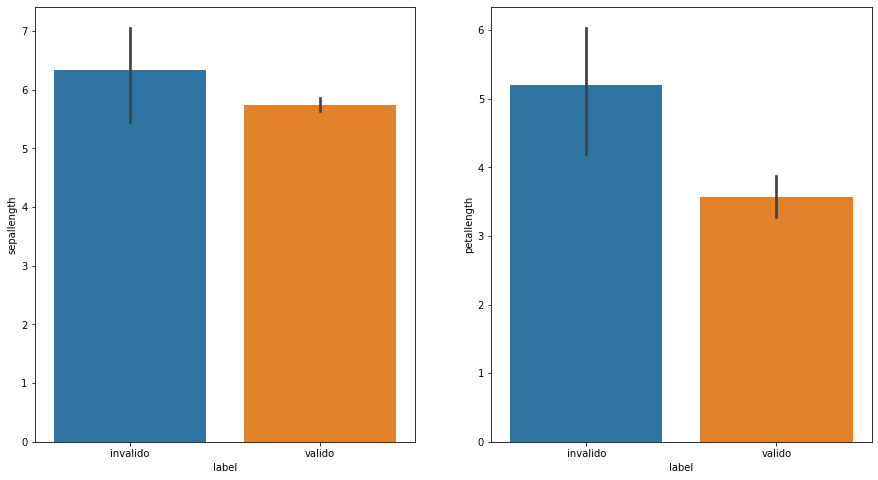

In [8]:
#Iniciamos una figura para graficar
fig = plt.figure(figsize=(15, 8))

# plot seaborn: barplot
plt.subplot(1, 2, 1) # Primer grafico
sns.barplot(
    x='label',
    y='sepallength',
    data=df
)

# plot seaborn: barplot
plt.subplot(1, 2, 2) # Segundo grafico
sns.barplot(
    x='label',
    y='petallength',
    data=df 
)

<AxesSubplot:xlabel='label', ylabel='petallength'>

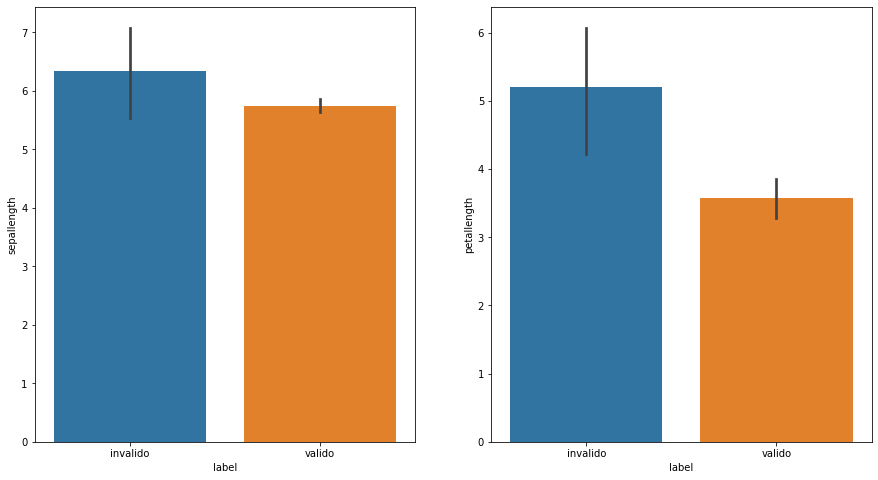

In [9]:
#Iniciamos una figura para insertar los graficos
fig = plt.figure(figsize=(15, 8))

# plot seaborn: barplot
plt.subplot(1, 2, 1) # Primer grafico
sns.barplot(
    x='label',
    y='sepallength',
    data=df
)

# plot seaborn: barplot
plt.subplot(1, 2, 2) # Segundo grafico
sns.barplot(
    x='label',
    y='petallength',
    data=df 
)

5. Filtre los datos válidos y realice un gráfico de *sepalLength* vs *petalLength* categorizados por la etiqueta **species**.

<AxesSubplot:xlabel='species', ylabel='petallength'>

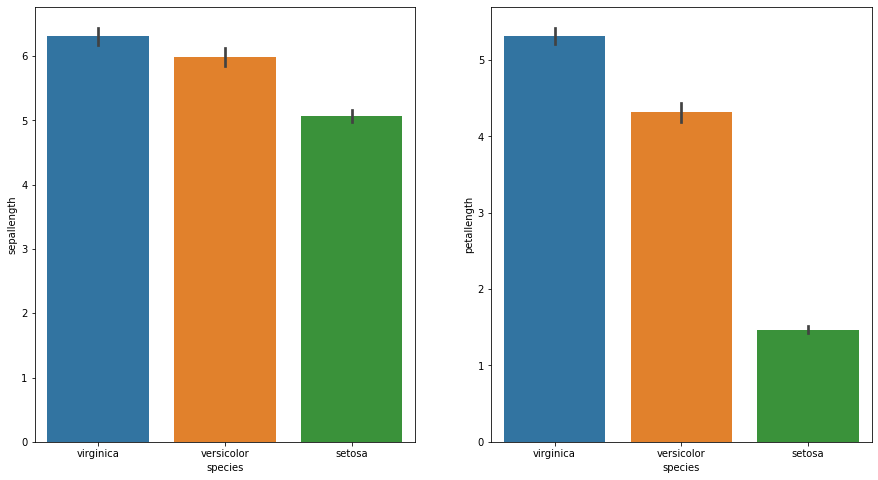

In [10]:
mask_label = df['label']!='invalido' #Creamos una mascara para los elementos invalidos
mask_species = df["species"] !="default" #Sacamos las especies default

aux = df[mask_label & mask_species] #Creamos un dataframe auxiliar para graficar los datos

fig = plt.figure(figsize=(15, 8)) #Iniciamos una figura 

# plot seaborn: barplo
plt.subplot(1, 2, 1) # Primer grafico
sns.barplot(
    x='species',
    y='sepallength',
    data=aux 
)

plt.subplot(1, 2, 2) # Segundo grafico
sns.barplot(
    x='species',
    y='petallength',
    data=aux 
)
